# Santhosh Prabhu
# 220968025
# DSE-A

+----------------+----------------+--------------------+----------------------------+--------------------------+
|   Algorithm    | Number of Jobs | Number of Machines | Makespan (Processing Time) | Execution Time (Seconds) |
+----------------+----------------+--------------------+----------------------------+--------------------------+
|      SHC       |       10       |         10         |             10             |           0.0            |
| Stochastic SHC |       10       |         10         |             15             |           0.0            |
|      SAHC      |       10       |         10         |             15             |           0.0            |
|      SHC       |       10       |         50         |             10             |           0.0            |
| Stochastic SHC |       10       |         50         |             15             |           0.0            |
|      SAHC      |       10       |         50         |             15             |           

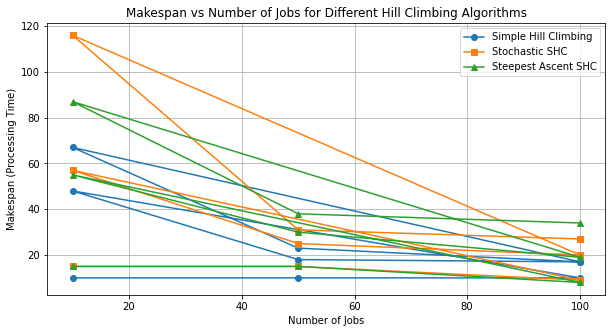

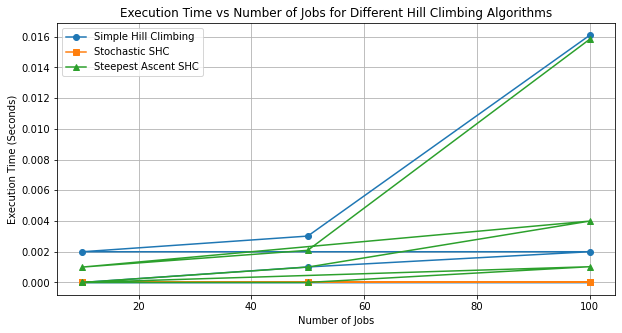

In [1]:
import random
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Function to generate a random schedule
def generate_initial_schedule(num_jobs, num_machines):
    schedule = [[] for _ in range(num_machines)]  # list of lists, each representing a machine
    job_durations = [random.randint(1, 10) for _ in range(num_jobs)]  # Random job durations
    for job_duration in job_durations:
        machine = random.choice(range(num_machines))  # Randomly assign job to machine
        schedule[machine].append(job_duration)
    return schedule

# Heuristic function to calculate makespan
def makespan(schedule):
    return max([sum(machine) for machine in schedule])  # Maximum processing time on any machine

# Simple Hill Climbing Algorithm (Optimized)
def simple_hill_climbing(num_jobs, num_machines, max_iterations=1000):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        neighbors = []
        for machine_index in range(num_machines):
            for job_index in range(len(schedule[machine_index])):
                new_schedule = [list(machine) for machine in schedule]  # Copy schedule
                job = new_schedule[machine_index].pop(job_index)
                random_machine = random.choice([i for i in range(num_machines) if i != machine_index])
                new_schedule[random_machine].append(job)
                neighbors.append(new_schedule)
        
        neighbor_costs = [makespan(neighbor) for neighbor in neighbors]
        min_cost_index = neighbor_costs.index(min(neighbor_costs))
        
        if neighbor_costs[min_cost_index] < current_cost:
            schedule = neighbors[min_cost_index]
            current_cost = neighbor_costs[min_cost_index]
        else:
            break  # No improvement found
        iteration += 1
        
    return schedule, current_cost

# Stochastic Hill Climbing Algorithm (Optimized)
def stochastic_hill_climbing(num_jobs, num_machines, max_iterations=1000):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        # Randomly pick a job and move it to a random machine
        machine_index = random.choice(range(num_machines))
        if len(schedule[machine_index]) > 0:
            job_index = random.choice(range(len(schedule[machine_index])))
            job = schedule[machine_index].pop(job_index)
            random_machine = random.choice([i for i in range(num_machines) if i != machine_index])
            schedule[random_machine].append(job)
        
        new_cost = makespan(schedule)
        if new_cost < current_cost:
            current_cost = new_cost
        else:
            break  # No improvement found
        iteration += 1
        
    return schedule, current_cost

# Steepest Ascent Hill Climbing Algorithm (Optimized)
def steepest_ascent_hill_climbing(num_jobs, num_machines, max_iterations=1000, neighbor_count=10):
    schedule = generate_initial_schedule(num_jobs, num_machines)
    current_cost = makespan(schedule)
    
    iteration = 0
    while iteration < max_iterations:
        neighbors = []
        for machine_index in range(num_machines):
            for job_index in range(len(schedule[machine_index])):
                new_schedule = [list(machine) for machine in schedule]
                job = new_schedule[machine_index].pop(job_index)
                for random_machine in range(num_machines):
                    if random_machine != machine_index:
                        new_schedule[random_machine].append(job)
                        neighbors.append(new_schedule)
        
        # Limit the number of neighbors checked to improve speed
        neighbors = random.sample(neighbors, min(neighbor_count, len(neighbors)))
        
        neighbor_costs = [makespan(neighbor) for neighbor in neighbors]
        min_cost_index = neighbor_costs.index(min(neighbor_costs))
        
        if neighbor_costs[min_cost_index] < current_cost:
            schedule = neighbors[min_cost_index]
            current_cost = neighbor_costs[min_cost_index]
        else:
            break  # No improvement found
        iteration += 1
        
    return schedule, current_cost

# Run the algorithms with optimized settings and collect results
job_sizes = [10, 50, 100]  # Smaller job sizes for faster execution
machine_sizes = [10, 50, 100]  # Smaller machine sizes for faster execution

results = []

# Run for each combination of job sizes and machine sizes
for num_jobs in job_sizes:
    for num_machines in machine_sizes:
        # Test Simple Hill Climbing
        start_time = time.time()
        _, shc_cost = simple_hill_climbing(num_jobs, num_machines)
        shc_time = time.time() - start_time
        
        # Test Stochastic Hill Climbing
        start_time = time.time()
        _, stochastic_shc_cost = stochastic_hill_climbing(num_jobs, num_machines)
        stochastic_shc_time = time.time() - start_time
        
        # Test Steepest Ascent Hill Climbing
        start_time = time.time()
        _, sahc_cost = steepest_ascent_hill_climbing(num_jobs, num_machines)
        sahc_time = time.time() - start_time
        
        # Store results
        results.append(("SHC", num_jobs, num_machines, shc_cost, shc_time))
        results.append(("Stochastic SHC", num_jobs, num_machines, stochastic_shc_cost, stochastic_shc_time))
        results.append(("SAHC", num_jobs, num_machines, sahc_cost, sahc_time))

# Create a PrettyTable instance for readable results
table = PrettyTable()
table.field_names = ["Algorithm", "Number of Jobs", "Number of Machines", "Makespan (Processing Time)", "Execution Time (Seconds)"]

# Add results to the table
for result in results:
    table.add_row(result)

# Print the table
print(table)

# Plotting makespan vs. job sizes for different algorithms
plt.figure(figsize=(10, 5))
plt.plot(job_sizes * len(machine_sizes), [result[3] for result in results if result[0] == "SHC"], label='Simple Hill Climbing', marker='o')
plt.plot(job_sizes * len(machine_sizes), [result[3] for result in results if result[0] == "Stochastic SHC"], label='Stochastic SHC', marker='s')
plt.plot(job_sizes * len(machine_sizes), [result[3] for result in results if result[0] == "SAHC"], label='Steepest Ascent SHC', marker='^')
plt.xlabel('Number of Jobs')
plt.ylabel('Makespan (Processing Time)')
plt.title('Makespan vs Number of Jobs for Different Hill Climbing Algorithms')
plt.legend()
plt.grid(True)
plt.show()

# Plotting execution time vs. job sizes for different algorithms
plt.figure(figsize=(10, 5))
plt.plot(job_sizes * len(machine_sizes), [result[4] for result in results if result[0] == "SHC"], label='Simple Hill Climbing', marker='o')
plt.plot(job_sizes * len(machine_sizes), [result[4] for result in results if result[0] == "Stochastic SHC"], label='Stochastic SHC', marker='s')
plt.plot(job_sizes * len(machine_sizes), [result[4] for result in results if result[0] == "SAHC"], label='Steepest Ascent SHC', marker='^')
plt.xlabel('Number of Jobs')
plt.ylabel('Execution Time (Seconds)')
plt.title('Execution Time vs Number of Jobs for Different Hill Climbing Algorithms')
plt.legend()
plt.grid(True)
plt.show()
